In [300]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.fftpack import fft, fftfreq
from parametricaudio import ParametricAudioModel as PAM

%load_ext autoreload
%aimport parametricaudio
%autoreload 1

dB = lambda x: 20*np.log10(np.abs(x))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Model 
Creates a model for the parametric audio system.
To avoid the kinks from applying the modulation, the carrier is padded a number of cycles at each end, without modulation.
The input signal is smoothed at both ends to avoid the sharp transision between modulation and no modulation.

In [ ]:
fs=192e3 # Default for 40kHz carrier
model = PAM(demodulation='envelope',fs=fs,
            padcycles=100,smoothcycles=25,
           lpf=True)

## Two sines
An input signal consisting of two sine waves, without noise.

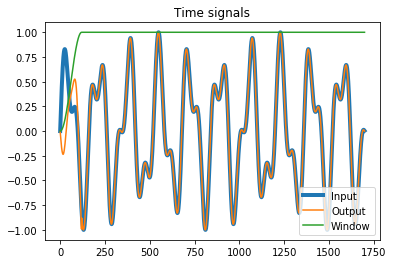

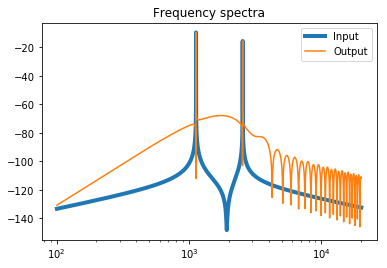

In [329]:
periods = 1000
f0 = 1.13e3
n = np.ceil(periods*fs/f0).astype('int')

inputsignal = np.sin(2*np.pi*f0*np.r_[0:n]/fs) + 0.5*np.sin(4.5*np.pi*f0*np.r_[0:n]/fs)
inputsignal = inputsignal/np.max(np.abs(inputsignal))
outputsignal = model.simulate_path(inputsignal)

ridx = np.r_[:np.floor(10/periods*n).astype('int')]
plt.plot(inputsignal[ridx],label='Input',linewidth=4)
plt.plot(outputsignal[ridx],label='Output')
plt.plot(model.window[ridx],label='Window')
plt.legend(loc='lower right')
plt.title('Time signals')
plt.show()

inputspectrum = fft(inputsignal)/n
outputspectrum = fft(outputsignal)/n
f = fftfreq(n,1/fs)
idx=(f<20e3) & (f>100)
plt.semilogx(f[idx],dB(inputspectrum[idx]),label='Input',linewidth=4)
plt.semilogx(f[idx],dB(outputspectrum[idx]),label='Output')
plt.legend()
plt.title('Frequency spectra')
plt.show()

## Noisy sine signal

## Pure noise signal